In [1]:
from google.colab import drive
import os
drive.mount('./gdrive')
saved_model_dir = './gdrive/My Drive/Colab Notebooks/toro_or_hiko/data'
print(*os.listdir(saved_model_dir))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive
井上トロ ひこにゃん


In [2]:
# データセットディレクトリ作成
base_dir = './toro_or_hiko'
os.mkdir(base_dir)

# 訓練・検証・テストディレクトリ作成
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 訓練ディレクトリ @ トロ用・ひこにゃん用
train_cats_dir = os.path.join(train_dir, 'toro')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'hiko')
os.mkdir(train_dogs_dir)

# 検証用ディレクトリ @ トロ用・ひこにゃん用
validation_cats_dir = os.path.join(validation_dir, 'toro')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'hiko')
os.mkdir(validation_dogs_dir)

# テスト用ディレクトリ @ トロ用・ひこにゃん用
test_cats_dir = os.path.join(test_dir, 'toro')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'hiko')
os.mkdir(test_dogs_dir)

!ls

# |- gdrive
# |- toro_or_hiko
#    |- train
#       |- toro
#       |- hiko
#    |- validation
#       |- toro
#       |- hiko
#    |- test
#       |- toro
#       |- hiko

gdrive	sample_data  toro_or_hiko


In [3]:
# データ数が少ないので交差検証したほうがよいかもしれない

from sklearn.model_selection import train_test_split
import os, shutil

toro_path = os.listdir(saved_model_dir + '/井上トロ')
hiko_path = os.listdir(saved_model_dir + '/ひこにゃん')

train_toro, test_toro, _, _  = train_test_split(toro_path, [0]*len(toro_path), test_size=0.4)
test_toro, validation_toro, _, _ = train_test_split(test_toro, [0]*len(test_toro), test_size=0.5)
train_hiko, test_hiko, _, _  = train_test_split(hiko_path, [0]*len(hiko_path), test_size=0.4)
test_hiko, validation_hiko, _, _ = train_test_split(test_hiko, [0]*len(test_hiko), test_size=0.5)

base_dir = './toro_or_hiko'

# トロ画像をtrain/toroにコピー
print('1')
for fname in train_toro:
    src = os.path.join(saved_model_dir + '/井上トロ', fname)
    dst = os.path.join(base_dir + '/train/toro', fname)
    shutil.copyfile(src, dst)
print('2')
# トロ画像をtest/toroにコピー
for fname in test_toro:
    src = os.path.join(saved_model_dir + '/井上トロ', fname)
    dst = os.path.join(base_dir + '/test/toro', fname)
    shutil.copyfile(src, dst)
print('3')
# トロ画像をvalidation/toroにコピー
for fname in test_toro:
    src = os.path.join(saved_model_dir + '/井上トロ', fname)
    dst = os.path.join(base_dir + '/validation/toro', fname)
    shutil.copyfile(src, dst)

print('4')
# ひこにゃん画像をtrain/hikoにコピー
for fname in train_hiko:
    src = os.path.join(saved_model_dir + '/ひこにゃん', fname)
    dst = os.path.join(base_dir + '/train/hiko', fname)
    shutil.copyfile(src, dst)
print('5')
# ひこにゃん画像をtest/hikoにコピー
for fname in test_hiko:
    src = os.path.join(saved_model_dir + '/ひこにゃん', fname)
    dst = os.path.join(base_dir + '/test/hiko', fname)
    shutil.copyfile(src, dst)
print('6')
# ひこにゃん画像をvalidation/hikoにコピー
for fname in test_hiko:
    src = os.path.join(saved_model_dir + '/ひこにゃん', fname)
    dst = os.path.join(base_dir + '/validation/hiko', fname)
    shutil.copyfile(src, dst)


1
2
3
4
5
6


Found 548 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 17s 848ms/step - loss: 0.6913 - acc: 0.5323 - val_loss: 0.6827 - val_acc: 0.6339
Epoch 2/100
20/20 [==============================] - 12s 595ms/step - loss: 0.6773 - acc: 0.5595 - val_loss: 0.6544 - val_acc: 0.6448
Epoch 3/100
20/20 [==============================] - 12s 622ms/step - loss: 0.6541 - acc: 0.6326 - val_loss: 0.6067 - val_acc: 0.7158
Epoch 4/100
20/20 [==============================] - 12s 592ms/step - loss: 0.5935 - acc: 0.6935 - val_loss: 0.5458 - val_acc: 0.7432
Epoch 5/100
20/20 [==============================] - 12s 610ms/step - loss: 0.5972 - acc: 0.6891 - val_loss: 0.5275 - val_acc: 0.7541
Epoch 6/100
20/20 [==============================] - 13s 629ms/step - loss: 0.5494 - acc: 0.7484 - val_loss: 0.5054 - val_acc: 0.7650
Epoch 7/100
20/20 [==============================] - 12s 622ms/step - loss: 0.5471 - acc: 0.7459 - val_loss: 0.4414 - val_acc: 0.7978
Epoch 8/100
20/20 [==============================] - 13s 636ms/step - loss

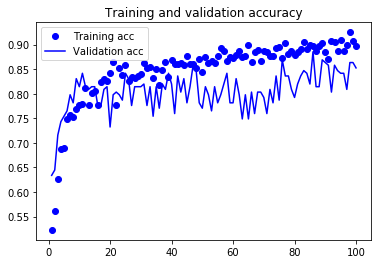

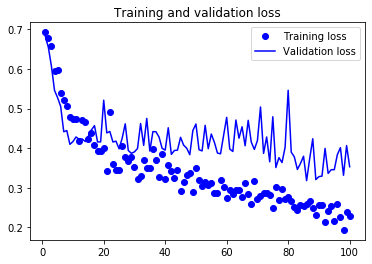

In [5]:
from keras import layers, models, optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# モデルの構築
model = models.Sequential()

# Conv-Pool 4段 + Dropout + FC 2段
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

# ディレクトリ内の画像をすべて150x150に変換
# binary_crossentropyを用いるために2値ラベルが必要なので、class_mode='binary'
# ディレクトリごとにラベルが決定される
# |- toro_or_hiko
#    |- train ← なうここ. catsとdogsでラベリングされる
#       |- cats
#       |- dogs
#    |- validation
#       |- cats
#       |- dogs
#    |- test
#       |- cats
#       |- dogs
# 20個ごとにバッチにまとめて出力
# RGB画像(20, 150, 150, 3)と2値ラベル(20,)を生成する
train_dir = './toro_or_hiko/train'
validation_dir = './toro_or_hiko/validation'


# -20〜20度の範囲でランダムに回転
# 水平・垂直に20%ランダムに平行移動
# 20%の割合でランダムに等積変形(平行四辺形っぽく)
# 20%の割合でランダムにズーム
# x軸反転を許可
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



# ジェネレータからモデルの学習に入る
history = model.fit_generator(train_generator,
                              steps_per_epoch=20,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=30)

model.save('toro_or_hiko_2.h5')
saved_model_dir = './gdrive/My Drive/Colab Notebooks/saved_model'
!cp toro_or_hiko_2.h5 gdrive/My\ Drive/Colab\ Notebooks/saved_model

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________
Found 548 images belonging to 2 classes.
Found 183 images belonging to 2 classes.
Epoch 1/200
2/9 [=====>...

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 4s 457ms/step - loss: 0.7613 - acc: 0.5389 - val_loss: 0.6695 - val_acc: 0.5500
Epoch 2/200
9/9 [==============================] - 2s 236ms/step - loss: 0.7556 - acc: 0.5317 - val_loss: 0.6506 - val_acc: 0.6000
Epoch 3/200
9/9 [==============================] - 2s 238ms/step - loss: 0.7454 - acc: 0.5333 - val_loss: 0.5975 - val_acc: 0.7000
Epoch 4/200
9/9 [==============================] - 3s 345ms/step - loss: 0.6430 - acc: 0.6278 - val_loss: 0.5524 - val_acc: 0.7674
Epoch 5/200
9/9 [==============================] - 2s 222ms/step - loss: 0.6778 - acc: 0.6381 - val_loss: 0.6254 - val_acc: 0.6333
Epoch 6/200
9/9 [==============================] - 2s 261ms/step - loss: 0.6958 - acc: 0.5500 - val_loss: 0.5888 - val_acc: 0.6667
Epoch 7/200
9/9 [==============================] - 3s 306ms/step - loss: 0.6128 - acc: 0.6611 - val_loss: 0.4677 - val_acc: 0.8837
Epoch 8/200
9/9 [==============================] - 3s 297ms/step - loss: 0.6277 - acc: 0.6556 -

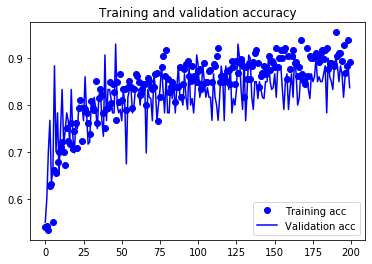

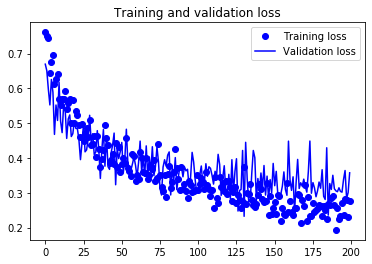

In [17]:
from keras.applications import VGG16, VGG19

# ファインチューニング
# 1. ベースネットワーク(VGG16)にカスタムネットワークを接続
# 2. ベースネットワークを凍結し、カスタムネットワークを訓練
# 3. ベースネットワークの一部を解凍し、カスタムネットワークと同時に訓練
# このセクションでは1. 2. を行っている


conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

conv_base.trainable = False

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])


history = model.fit_generator(train_generator,
                              steps_per_epoch=m.ceil(len(train_toro)/32),
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=m.ceil(len(validation_toro)/32))

model.save('toro_or_hiko_3.h5')
saved_model_dir = './gdrive/My Drive/Colab Notebooks/saved_model'
!cp toro_or_hiko_3.h5 gdrive/My\ Drive/Colab\ Notebooks/saved_model

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

input_1 : trainable →  False
block1_conv1 : trainable →  False
block1_conv2 : trainable →  False
block1_pool : trainable →  False
block2_conv1 : trainable →  False
block2_conv2 : trainable →  False
block2_pool : trainable →  False
block3_conv1 : trainable →  False
block3_conv2 : trainable →  False
block3_conv3 : trainable →  False
block3_pool : trainable →  False
block4_conv1 : trainable →  False
block4_conv2 : trainable →  False
block4_conv3 : trainable →  False
block4_pool : trainable →  False
block5_conv1 : trainable →  True
block5_conv2 : trainable →  True
block5_conv3 : trainable →  True
block5_pool : trainable →  True
Epoch 1/100
  6/100 [>.............................] - ETA: 44s - loss: 0.0061 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 35s 348ms/step - loss: 0.0217 - acc: 0.9920 - val_loss: 0.3682 - val_acc: 0.8962
Epoch 2/100
100/100 [==============================] - 32s 320ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.3970 - val_acc: 0.8962
Epoch 3/100
100/100 [==============================] - 31s 310ms/step - loss: 0.0153 - acc: 0.9960 - val_loss: 0.3711 - val_acc: 0.9016
Epoch 4/100
100/100 [==============================] - 33s 330ms/step - loss: 0.0065 - acc: 0.9995 - val_loss: 0.3928 - val_acc: 0.8962
Epoch 5/100
100/100 [==============================] - 30s 303ms/step - loss: 0.0149 - acc: 0.9950 - val_loss: 0.3487 - val_acc: 0.9016
Epoch 6/100
100/100 [==============================] - 34s 337ms/step - loss: 0.0084 - acc: 0.9985 - val_loss: 0.3588 - val_acc: 0.9071
Epoch 7/100
100/100 [==============================] - 31s 311ms/step - loss: 0.0070 - acc: 0.9980 - val_loss: 0.3902 - val_acc: 0.8962
Epoch 8/100
100/100 [==============================] - 32s 3

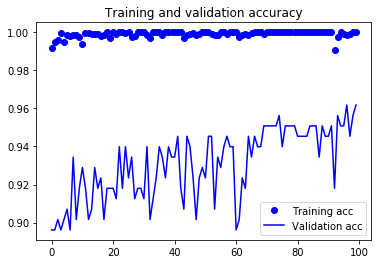

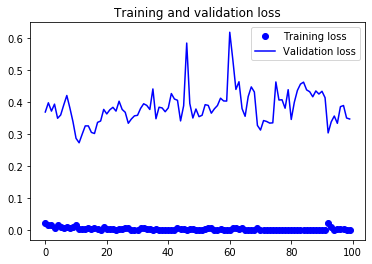

In [12]:
# ベースネットワークの一部を解凍
import math as m
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print(layer.name, ': trainable → ', layer.trainable)
      

    
    
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              #steps_per_epoch=m.ceil(len(train_toro)/32),
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              #validation_steps=m.ceil(len(validation_toro)/32))
                              validation_steps=50)

model.save('toro_or_hiko_4.h5')
saved_model_dir = './gdrive/My Drive/Colab Notebooks/saved_model'
!cp toro_or_hiko_4.h5 gdrive/My\ Drive/Colab\ Notebooks/saved_model

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

input_4 : trainable →  False
block1_conv1 : trainable →  False
block1_conv2 : trainable →  False
block1_pool : trainable →  False
block2_conv1 : trainable →  False
block2_conv2 : trainable →  False
block2_pool : trainable →  False
block3_conv1 : trainable →  False
block3_conv2 : trainable →  False
block3_conv3 : trainable →  False
block3_pool : trainable →  False
block4_conv1 : trainable →  False
block4_conv2 : trainable →  False
block4_conv3 : trainable →  False
block4_pool : trainable →  False
block5_conv1 : trainable →  True
block5_conv2 : trainable →  True
block5_conv3 : trainable →  True
block5_pool : trainable →  True
Epoch 1/200


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 4s 480ms/step - loss: 0.1789 - acc: 0.9333 - val_loss: 0.2826 - val_acc: 0.8333
Epoch 2/200
9/9 [==============================] - 2s 225ms/step - loss: 0.2009 - acc: 0.9552 - val_loss: 0.2406 - val_acc: 0.9167
Epoch 3/200
9/9 [==============================] - 3s 284ms/step - loss: 0.2375 - acc: 0.8889 - val_loss: 0.3982 - val_acc: 0.7833
Epoch 4/200
9/9 [==============================] - 3s 308ms/step - loss: 0.1779 - acc: 0.9500 - val_loss: 0.2936 - val_acc: 0.8605
Epoch 5/200
9/9 [==============================] - 3s 280ms/step - loss: 0.1528 - acc: 0.9496 - val_loss: 0.2006 - val_acc: 0.9333
Epoch 6/200
9/9 [==============================] - 3s 298ms/step - loss: 0.1767 - acc: 0.9278 - val_loss: 0.2943 - val_acc: 0.9000
Epoch 7/200
9/9 [==============================] - 3s 295ms/step - loss: 0.1188 - acc: 0.9500 - val_loss: 0.3380 - val_acc: 0.8605
Epoch 8/200
9/9 [==============================] - 3s 300ms/step - loss: 0.1444 - acc: 0.9273 -

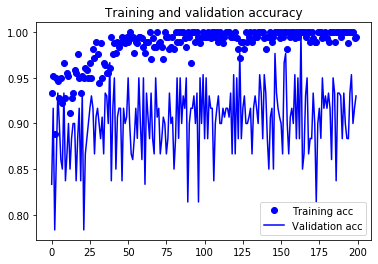

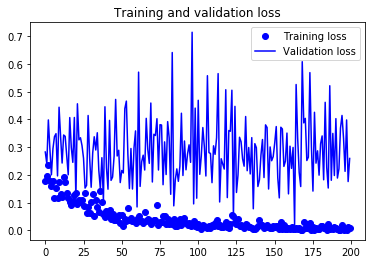

In [18]:
# ベースネットワークの一部を解凍
import math as m
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print(layer.name, ': trainable → ', layer.trainable)
      

    
    
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=m.ceil(len(train_toro)/32),
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=m.ceil(len(validation_toro)/32))


model.save('toro_or_hiko_5.h5')
saved_model_dir = './gdrive/My Drive/Colab Notebooks/saved_model'
!cp toro_or_hiko_5.h5 gdrive/My\ Drive/Colab\ Notebooks/saved_model

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()